# Exercise 6 – Networks
## Objectives:
Be able to
- use NetworkX to
  - load a graph;
  - manipulate graph structure;
  - calculate and visualize basic graph distributions, such as degree distribution;
  - calculate centrality measures and perform basic analysis, including finding most or least central nodes, or comparing between different types of centrality measures;
  - identify communities;
  - visualize graphs.
  

## Read these instructions before you start:
1. Download the `.ipynb` file of this notebook.
2. Follow this notebook step-by-step. Execute every cell and verify the result as you go.
3. __(new) If a cell has "TODO", then fill in appropriate code as instructed before executing the cell.__
4. Take notes by adding Markdown cells or add comments to existing code. Keep this notebook for future reference.

# NetworkX
NetworkX is a Python module that provides data structures for graphs (or networks) along with graph algorithms, generators, and drawing tools.

Part of this section is borrowed from the [networkx tutorial by Sarah Guido](https://github.com/sarguido/networkx-tutorial).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# The big python network analysis package
import networkx as nx
import itertools

In [3]:
import seaborn as sns
sns.set(style='ticks', color_codes=True, font_scale=1.3)

## 1 Adding & Editing Graph Nodes

We'll first take a look at creating a graph, and adding/editing nodes:

In [4]:
import networkx as nx

'''use g = nx.Graph() to create a graph'''

g = nx.Graph()

'''Lesson: use .add_node(1) to add a single node'''

# TODO: add a node
g.add_node(1)
g.add_node("a")

'''Lesson: use .add_nodes_from([2, 3, 'four', 5])  to add in bulk'''

# TODO: add multiple nodes
g.add_nodes_from([2, 3, 'four', 5])

g.nodes()  # run g.nodes() to view the graph

NodeView((1, 'a', 2, 3, 'four', 5))

In [6]:
'''Note that NetworkX won't complain if we re-add pre-existing nodes'''

# TODO: try re-adding nodes to see what happens
g.add_node("a")

g.nodes()  # display nodes

NodeView((1, 'a', 2, 3, 'four', 5))

In [7]:
'''Lesson: remove syntax is similar to adding, eg:
        .remove_node()
        .remove_nodes_from()
'''

# TODO: try removing both 1) single nodes, 2) nodes in bulk
g.remove_node("a")

g.nodes()  # display nodes

NodeView((1, 2, 3, 'four', 5))

## 2 Adding & Editing Edges

In [8]:
h = nx.Graph()  # let's create a 2nd graph to play with edges

'''Lesson: to create an edge, just specify the 2 nodes that define it: 
        .add_edge('a','b')
    Note that those nobdes also get added (no need to make them beforehand!)
'''

# TODO: create an edge

h.add_edge('a','b')

print ('edges:', h.edges())  # see your new edge
print ('nodes:', h.nodes())  # verify that new nodes were also added

edges: [('a', 'b')]
nodes: ['a', 'b']


In [9]:
'''Lesson: adding multiple edges is similar to adding multiple nodes:
        .add_edges_from([('x','y'), ('y','z')])
'''

# TODO: create multiple new edges
h.add_edges_from([('x','y'), ('y','z')])

print ('edges:', h.edges())  # see your new edge
print ('nodes:', h.nodes())  # verify that new nodes were also added

edges: [('a', 'b'), ('x', 'y'), ('y', 'z')]
nodes: ['a', 'b', 'x', 'y', 'z']


## 3 Visualizing graphs

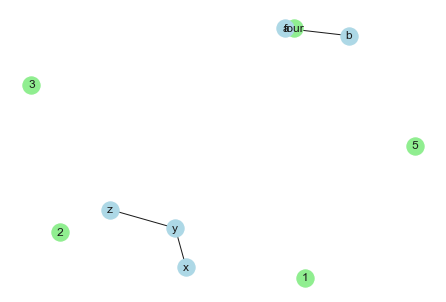

In [10]:
nx.draw(g, node_color='lightgreen', with_labels=True)
nx.draw(h, node_color='lightblue', with_labels=True)

## Exercise 1

### How would you create the following graph?

<img src="https://github.com/sarguido/networkx-tutorial/blob/master/materials/images/graph.png?raw=true" style="float:left" width="200" />

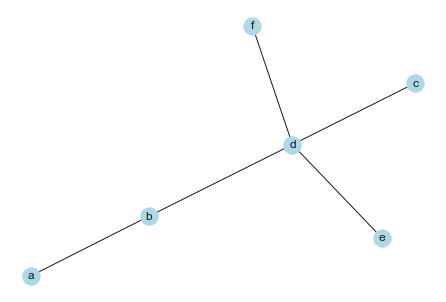

In [11]:
g = nx.Graph()

# TODO: create the graph illustrated above
g.add_edges_from([('a','b'),("c","d"),("e","d"),("f","d"),("b","d")])

nx.draw(g, node_color='lightblue', with_labels=True)

## 4 Directed Graphs

directed edges: [(1, 2), (2, 3)]


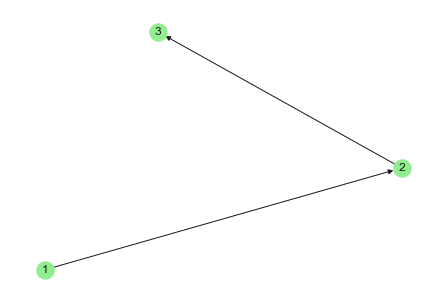

In [12]:
'''Lesson: use nx.DiGraph() to create a new directed graph
'''
dg = nx.DiGraph()
# TODO: create a directed graph

dg.add_edges_from([(1,2), (2,3)])

# TODO: run this cell, you should see 2 directed edges
print ('directed edges:', dg.edges())
nx.draw(dg, node_color='lightgreen', with_labels=True)

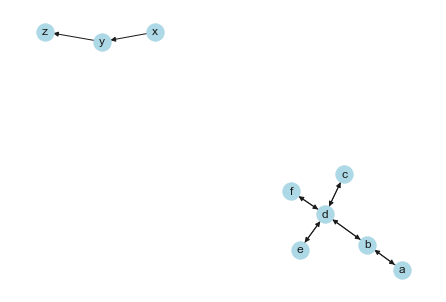

In [13]:
'''We can make directed graphs from existing graphs, eg:
        nx.DiGraph(g)
'''

# TODO: create a directed graph from g
h = nx.DiGraph(g)

h.add_edges_from([('x','y'), ('y','z')])
nx.draw(h, node_color='lightblue', with_labels=True)

## 5 Adding attributes to nodes and edges

Sometimes you may want to attach attributes to either the nodes or edges:

* Perhaps you want to save node properties that will be helpful with future analysis
* Perhaps you want to attach visual descriptions, such a node size, edge width or graph color

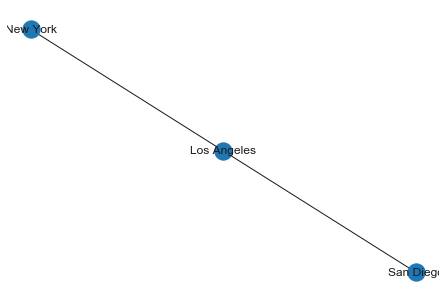

In [14]:
cities = nx.Graph()

'''Lesson: to add an edge with attributes, you may use:
       .add_edge('a', 'b', **attributes)
   where the attributes are attribute-value pairs'''

# Add four edges to cities. For each edge, add an attribute "distance".
# The distance value is given below.
#     San Diego -- Los Angeles 120.5
#     New York -- Los Angeles 2789.4
#     New York -- San Diego 2759.4
#     Boston -- New York 215.3
# For example, 
#     .add_edge('San Diego', 'Los Angeles', distance=120.5)
#
# TODO: add all four edges

cities.add_edge('San Diego', 'Los Angeles', distance=120.5)
cities.add_edge('New York', 'Los Angeles', distance=2789.4)

# Display all edges with attribute data
cities.edges(data=True)
nx.draw(cities, with_labels=True)

In [15]:
cities.edges()

EdgeView([('San Diego', 'Los Angeles'), ('Los Angeles', 'New York')])

In [16]:
cities.edges(data=True)

EdgeDataView([('San Diego', 'Los Angeles', {'distance': 120.5}), ('Los Angeles', 'New York', {'distance': 2789.4})])

In [17]:
'''You may add attributes to existing edges (or nodes) as well.
   Here we iterate through all edges in the cities network, and
   add a "weight" attribute to each edge based on its "distance".
   
   Lesson: To add or change the attribute of an existing edge,
       G[source][target][attribute_name] = value
   where G is your graph object.
   
   For example,
       G[source][target]['weight'] = 100
'''
for source, target, data in cities.edges(data=True):
    # TODO: set the weight of each edge to 3000-edge['distance']
    cities[source][target]['weight'] = 3000 - cities[source][target]['distance']
    

# Display all edges with attribute data
cities.edges(data=True)

EdgeDataView([('San Diego', 'Los Angeles', {'distance': 120.5, 'weight': 2879.5}), ('Los Angeles', 'New York', {'distance': 2789.4, 'weight': 210.5999999999999})])

In [21]:
'''You can use the edge weight attribute created above to customize
   the visualization of the network using "spring layout".'''
pos2 = nx.spring_layout(cities)  # pos is a dict that stores coordinates of nodes
pos2

{'San Diego': array([ 0.72050553, -0.71240469]),
 'Los Angeles': array([ 0.27949447, -0.27635013]),
 'New York': array([-1.        ,  0.98875482])}

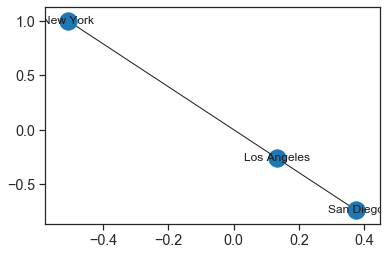

In [20]:
fig, ax = plt.subplots()
#nx.draw_networkx_nodes(..., ax=ax)
nx.draw_networkx(cities,pos2,ax=ax)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

In [22]:
pos2

{'San Diego': array([-7.31976208e-04,  7.38156324e-01]),
 'Los Angeles': array([-2.59631358e-04,  2.61843676e-01]),
 'New York': array([ 9.91607566e-04, -1.00000000e+00])}

## 6 Describing a Network

### Degree Distribution:



<img src="https://github.com/sarguido/networkx-tutorial/blob/master/materials/images/graph.png?raw=true" style="float:left; padding-right:20px;" width="200" />

- 1 node with 4 edges
- 1 node with 2 edges
- 4 nodes with 1 edge

Distribution:

    [(1:4), (1:2), (4:1)]

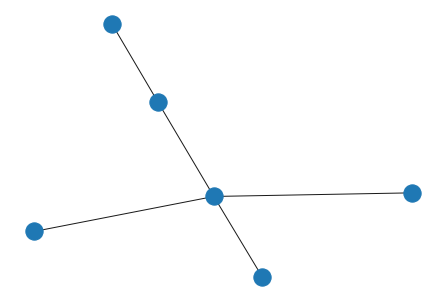

In [22]:
nx.draw(g)

In [23]:
# Degree Distribution for all nodes
print ('Degree Distribution:', g.degree())

Degree Distribution: [('a', 1), ('b', 2), ('c', 1), ('d', 4), ('e', 1), ('f', 1)]


<img src="https://github.com/sarguido/networkx-tutorial/blob/master/materials/images/graph-paths.png?raw=true" style="float:left;" width="600" />

In [24]:
# Generate the graph above
paths = nx.Graph()
paths.add_edges_from([
    ('A','B'), ('B','D'), ('B','C'), ('D','E'), ('D','C'),
    ('C','1'), ('1','2'), ('1','3'), ('2','3'), 
    ('E','2'), ('E','4')])

# Display shortest path details
print ('Shortest path from A to E is', 
       nx.shortest_path_length(paths, 'A','E'), 'hops:')
print (nx.shortest_path(paths, 'A','E'))

Shortest path from A to E is 3 hops:
['A', 'B', 'D', 'E']


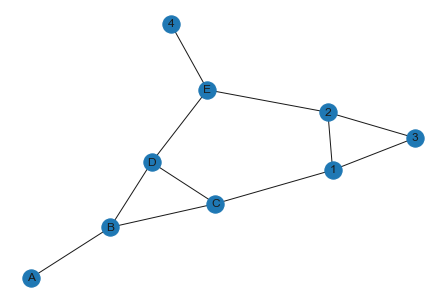

In [26]:
# TODO: Visualize the above network using nx.draw()
nx.draw(paths, with_labels=True)

In [27]:
nx.shortest_path(paths, 'A','4')

['A', 'B', 'D', 'E', '4']

## 7 Network Centrality

* **Degree: number of edges** for node X
* **Betweenness: number of shortest paths** that pass through node X
* **Closeness: average of the shortest paths** between X and all other nodes

The higher the values, the more "central" a node is.

<img src="https://github.com/sarguido/networkx-tutorial/blob/master/materials/images/centrality1.png?raw=true" style="float:left;" width="400" />
<img src="https://github.com/sarguido/networkx-tutorial/blob/master/materials/images/centrality2.png?raw=true" style="float:left;" width="200" />

In [28]:
''' To calculate Degree Distribution for all nodes, use:
    g.degree()  for non-normalized values,
    nx.degree_centrality(g)   for normalized values
'''

# TODO degree distrib., non-normalized


# TODO degree distrib., normalized
nx.degree_centrality(h) 


{'a': 0.25,
 'b': 0.5,
 'c': 0.25,
 'd': 1.0,
 'e': 0.25,
 'f': 0.25,
 'x': 0.125,
 'y': 0.25,
 'z': 0.125}

In [29]:
''' To calculate betweenness centrality, use:
    nx.betweenness_centrality(g, normalized=True/False)   default is True
'''

# TODO find betweenness centrality (both normalized and non)

nx.betweenness_centrality(h, normalized=True)


{'a': 0.0,
 'b': 0.14285714285714285,
 'c': 0.0,
 'd': 0.3214285714285714,
 'e': 0.0,
 'f': 0.0,
 'x': 0.0,
 'y': 0.017857142857142856,
 'z': 0.0}

In [30]:
nx.betweenness_centrality(h, normalized=False)


{'a': 0.0,
 'b': 8.0,
 'c': 0.0,
 'd': 18.0,
 'e': 0.0,
 'f': 0.0,
 'x': 0.0,
 'y': 1.0,
 'z': 0.0}

In [31]:
''' to calculate closeness centrality, use:
    nx.closeness_centrality(g)
'''

# TODO find closeness centrality

nx.closeness_centrality(h)

{'a': 0.2604166666666667,
 'b': 0.390625,
 'c': 0.3125,
 'd': 0.5208333333333334,
 'e': 0.3125,
 'f': 0.3125,
 'x': 0.0,
 'y': 0.125,
 'z': 0.16666666666666666}

## 8 Import Data from an External File

The classic Les Miserables dataset. All characters in Victor Hugo's novel 'Les Misérables connected by whether they co-occur in a chapter.

A bit more about this dataset here: http://konect.uni-koblenz.de/networks/moreno_lesmis


In [32]:
''' To load an external network file stored in GEXF format, use:
    nx.read_gexf('filename.gexf', relabel=True)'''

les_mis = nx.read_gexf('LesMiserables.gexf', relabel=True)


In [33]:
''' To get the number of nodes and edges in a graph, use:
    nx.number_of_nodes(g)
    nx.number_of_edges(g) '''

# TODO find number of nodes and edges in the graph
nx.number_of_edges(les_mis)

254

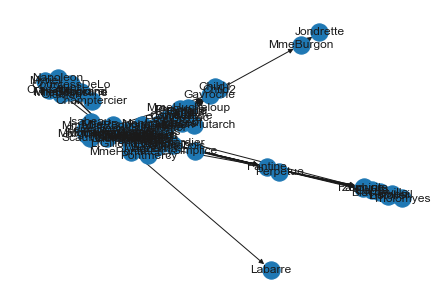

In [34]:
# TODO visualize g using nx.draw, displaying the labels (with_labels=True).
nx.draw(les_mis, with_labels=True)

## 9 Degree Distribution

In [35]:
'''Please study the output of each line. We are getting prepared
   to generate a degree distribution plot.'''
degrees = nx.degree(les_mis)
degree_values = list(dict(les_mis.degree).values())
degree_value_counts = pd.value_counts(degree_values).sort_index()

In [36]:
pd.DataFrame(degree_values)

,0
0,10
1,1
2,3
3,3
4,1
...,...
72,3
73,2
74,2
75,7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22330890>]],
      dtype=object)

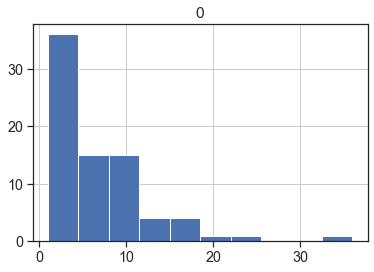

In [37]:
pd.DataFrame(degree_values).hist()

## 10 Edge Weight Distribution

In [38]:
les_mis.edges(data=True)

OutEdgeDataView([('Napoleon', 'Myriel', {'id': '0'}), ('MlleBaptistine', 'Myriel', {'id': '1', 'weight': 8.0}), ('MmeMagloire', 'Myriel', {'id': '2', 'weight': 10.0}), ('MmeMagloire', 'MlleBaptistine', {'id': '3', 'weight': 6.0}), ('CountessDeLo', 'Myriel', {'id': '4'}), ('Geborand', 'Myriel', {'id': '5'}), ('Champtercier', 'Myriel', {'id': '6'}), ('Cravatte', 'Myriel', {'id': '7'}), ('Count', 'Myriel', {'id': '8', 'weight': 2.0}), ('OldMan', 'Myriel', {'id': '9'}), ('Valjean', 'Myriel', {'id': '13', 'weight': 5.0}), ('Valjean', 'MlleBaptistine', {'id': '12', 'weight': 3.0}), ('Valjean', 'MmeMagloire', {'id': '11', 'weight': 3.0}), ('Valjean', 'Labarre', {'id': '10'}), ('Marguerite', 'Valjean', {'id': '14'}), ('MmeDeR', 'Valjean', {'id': '15'}), ('Isabeau', 'Valjean', {'id': '16'}), ('Gervais', 'Valjean', {'id': '17'}), ('Listolier', 'Tholomyes', {'id': '18', 'weight': 4.0}), ('Fameuil', 'Tholomyes', {'id': '19', 'weight': 4.0}), ('Fameuil', 'Listolier', {'id': '20', 'weight': 4.0}), (

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22330d50>]],
      dtype=object)

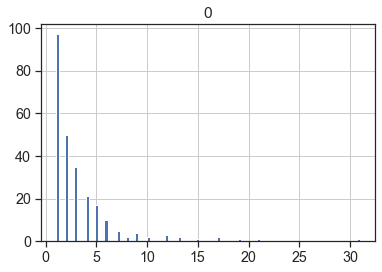

In [39]:
edge_weights = []
for node, neighbor, data in les_mis.edges(data=True):
    if 'weight' in data: 
        edge_weights.append(data['weight'])
    else: edge_weights.append(1)
edge_weights


# TODO: Use the edge_weights object to recreate the above plot.
pd.DataFrame(edge_weights).hist(bins=100)

## 11 Community Detection

The Girvan-Newman approach is a *hierarchical clustering approach* that focuses on removing the edges with the highest betweenness.

In [40]:
# Returns a generator that splits another community each time it is called
les_mis_communities = nx.community.girvan_newman(les_mis)

In [41]:
next(les_mis_communities)

({'Champtercier',
  'Count',
  'CountessDeLo',
  'Cravatte',
  'Geborand',
  'MlleBaptistine',
  'MmeMagloire',
  'Myriel',
  'Napoleon',
  'OldMan'},
 {'Anzelma',
  'Babet',
  'Bahorel',
  'Bamatabois',
  'BaronessT',
  'Blacheville',
  'Bossuet',
  'Boulatruelle',
  'Brevet',
  'Brujon',
  'Champmathieu',
  'Chenildieu',
  'Child1',
  'Child2',
  'Claquesous',
  'Cochepaille',
  'Combeferre',
  'Cosette',
  'Courfeyrac',
  'Dahlia',
  'Enjolras',
  'Eponine',
  'Fameuil',
  'Fantine',
  'Fauchelevent',
  'Favourite',
  'Feuilly',
  'Gavroche',
  'Gervais',
  'Gillenormand',
  'Grantaire',
  'Gribier',
  'Gueulemer',
  'Isabeau',
  'Javert',
  'Joly',
  'Jondrette',
  'Judge',
  'Labarre',
  'Listolier',
  'LtGillenormand',
  'Mabeuf',
  'Magnon',
  'Marguerite',
  'Marius',
  'MlleGillenormand',
  'MlleVaubois',
  'MmeBurgon',
  'MmeDeR',
  'MmeHucheloup',
  'MmePontmercy',
  'MmeThenardier',
  'Montparnasse',
  'MotherInnocent',
  'MotherPlutarch',
  'Perpetue',
  'Pontmercy',
  'Pr

In [42]:
# Every subsequent call to the generator results in a larger number of communities.
les_mis_communities = nx.community.girvan_newman(les_mis) 
for communities in les_mis_communities:
    print(len(communities)) 

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77


In [43]:
# Get the set of communities after n splits
les_mis_communities = nx.community.girvan_newman(les_mis) 
n = 5
for i in range(1,n):
    n_communities = next(les_mis_communities)
n_communities

({'Champtercier',
  'Count',
  'CountessDeLo',
  'Cravatte',
  'Geborand',
  'MlleBaptistine',
  'MmeMagloire',
  'Myriel',
  'Napoleon',
  'OldMan'},
 {'Bamatabois',
  'Brevet',
  'Champmathieu',
  'Chenildieu',
  'Cochepaille',
  'Fauchelevent',
  'Gervais',
  'Gribier',
  'Isabeau',
  'Judge',
  'Labarre',
  'MmeDeR',
  'MotherInnocent',
  'Scaufflaire',
  'Simplice',
  'Valjean',
  'Woman1'},
 {'Blacheville',
  'Dahlia',
  'Fameuil',
  'Fantine',
  'Favourite',
  'Listolier',
  'Marguerite',
  'Perpetue',
  'Tholomyes',
  'Zephine'},
 {'Anzelma',
  'Babet',
  'Bahorel',
  'BaronessT',
  'Bossuet',
  'Boulatruelle',
  'Brujon',
  'Child1',
  'Child2',
  'Claquesous',
  'Combeferre',
  'Cosette',
  'Courfeyrac',
  'Enjolras',
  'Eponine',
  'Feuilly',
  'Gavroche',
  'Gillenormand',
  'Grantaire',
  'Gueulemer',
  'Javert',
  'Joly',
  'LtGillenormand',
  'Mabeuf',
  'Magnon',
  'Marius',
  'MlleGillenormand',
  'MlleVaubois',
  'MmeHucheloup',
  'MmePontmercy',
  'MmeThenardier',
  

In [44]:
n_communities[0].pop()

'MlleBaptistine'

## 12 Force-directed Layout

Let's use force-directed (spring) layout to visualize the above community detection result.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0.5, 1.0, 'Community Detection and Force-directed Layout')

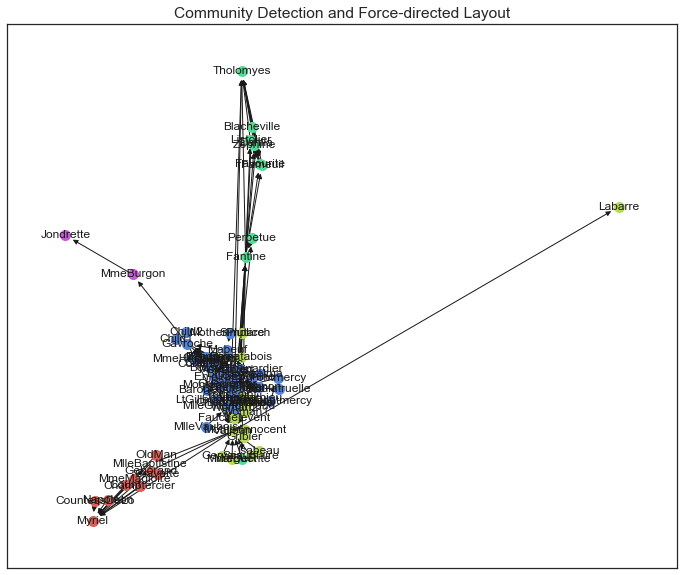

In [45]:
# Visualize the community detection result using force-directed layout

# Create spring layout, and save it as "pos". Use nx.spring_layout(g).
pos = nx.spring_layout(les_mis)


# Plot the nodes of each community using different colors.
palette = sns.color_palette('hls', len(n_communities))
fig, ax = plt.subplots(figsize=(12,10))
for i, ith_community in enumerate(n_communities):
    nx.draw_networkx_nodes(les_mis, pos, ith_community, 
                           node_size = 100,
                           node_color = palette[i], 
                           ax=ax)

'''Lesson: To draw edges and labels, use 
           nx.draw_networkx_edges(g) and
           nx.draw_networkx_labels(g).'''

# Draw network edges and labels
nx.draw_networkx_labels(les_mis, pos)
nx.draw_networkx_edges(les_mis, pos)

# Add a title "Community Detection and Force-directed Layout" using ax.set_title()
ax.set_title("Community Detection and Force-directed Layout")
